<a href="https://colab.research.google.com/github/saiharshitha002/saiharshitha002/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate
%matplotlib inline
purchase = pd.read_csv ("/content/SupermarketPurchase (1).csv")
purchase_copy = purchase.copy()
purchase.tail()

,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
697,1002,2210.000,8840.00,4,11960.00,1
698,1003,2500.000,2500.00,1,0.00,5
699,1004,347.045,694.09,2,605.91,12
700,1005,3750.000,3750.00,1,3750.00,12
701,1006,4150.000,4150.00,1,4150.00,12


In [ ]:
purchase.rename(columns={'AVG_Actual_price_12':'Avg_MRP','Purchase_Value':'Purchase_amount', 'No_of_Items':'Items_Qty','MONTH_SINCE_LAST_TRANSACTION':'TRANSACTION_MONTH'},inplace=True)

In [ ]:
purchase['Total_Discount'] = purchase['Total_Discount'] .astype(str).str.strip('\-')
purchase['Total_Discount']=purchase['Total_Discount'].astype(np.float)

In [ ]:
purchase.isnull().sum(),purchase.shape

(Cust_id              0
 Avg_MRP              0
 Purchase_amount      0
 Items_Qty            0
 Total_Discount       0
 TRANSACTION_MONTH    0
 dtype: int64,
 (702, 6))

In [ ]:
purchase.dtypes

Cust_id                int64
Avg_MRP              float64
Purchase_amount      float64
Items_Qty              int64
Total_Discount       float64
TRANSACTION_MONTH      int64
dtype: object

In [ ]:
print("Avg_MRP:",purchase['Avg_MRP'].nunique())
print("Purchase Value:",purchase['Purchase_amount'].nunique())
print("Total_Discount:",purchase['Total_Discount'].nunique())
print("Qty of Items:",purchase['Items_Qty'].nunique())
print("TRANSACTION_MONTH:",purchase['TRANSACTION_MONTH'].nunique())

Avg_MRP: 514
Purchase Value: 511
Total_Discount: 454
Qty of Items: 67
TRANSACTION_MONTH: 12


In [ ]:
pd.DataFrame([{'Avg_MRP': len(purchase['Avg_MRP'].value_counts()),
               'Purchase_amount': len(purchase['Purchase_amount'].value_counts()),
               'Total_Discount': len(purchase['Total_Discount'].value_counts()),
               'Items_Qty': len(purchase['Items_Qty'].value_counts()),
               'TRANSACTION_MONTH':len(purchase['TRANSACTION_MONTH'].value_counts()),
              }], columns = ['Avg_MRP', 'Purchase_amount', 'Total_Discount','Items_Qty', 'TRANSACTION_MONTH'], index=['Cust_id'])

,Avg_MRP,Purchase_amount,Total_Discount,Items_Qty,TRANSACTION_MONTH
Cust_id,514,511,454,67,12


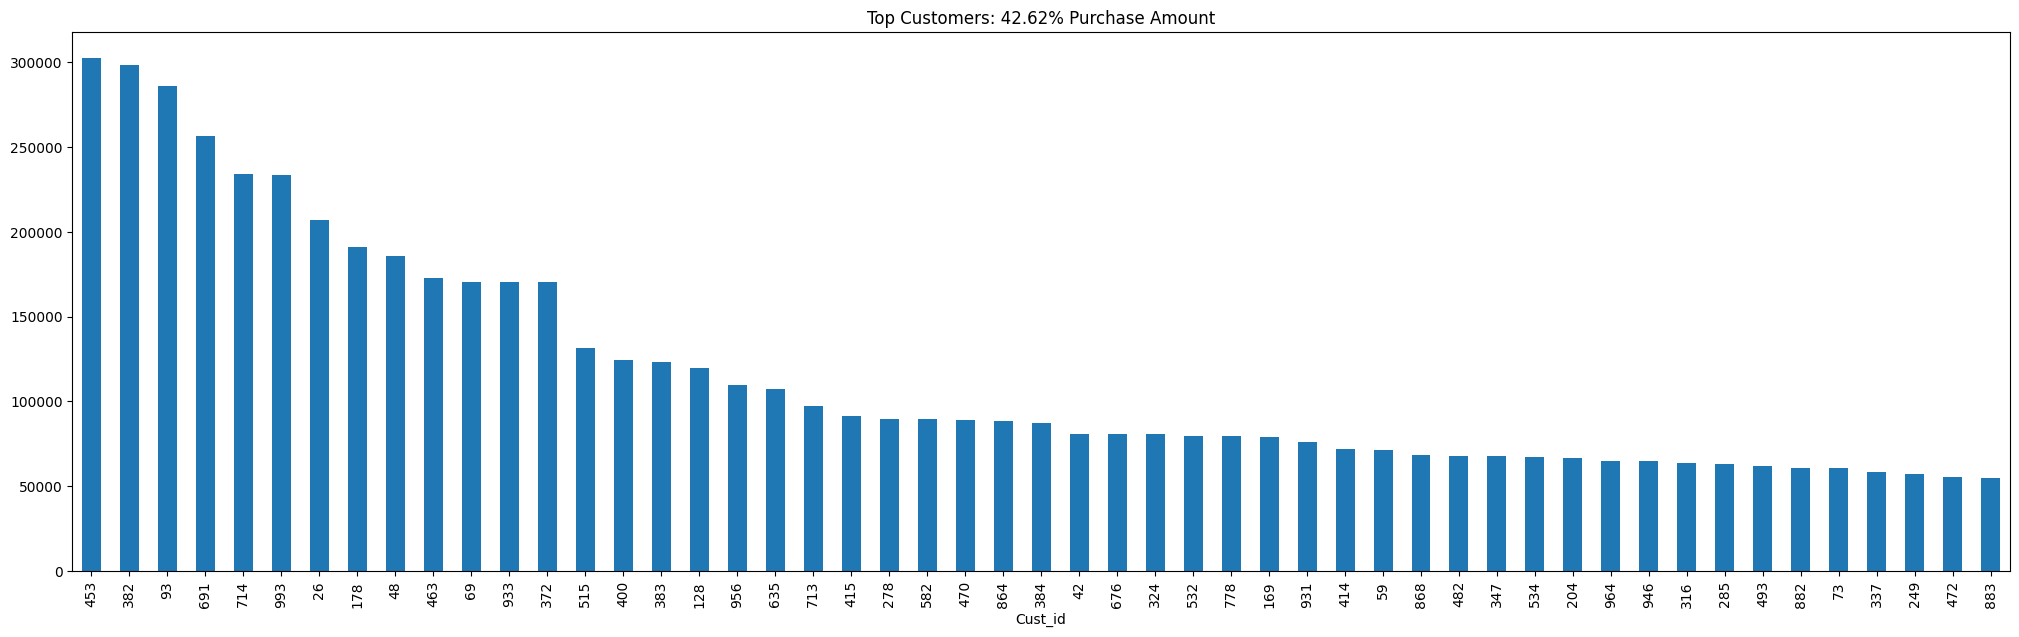

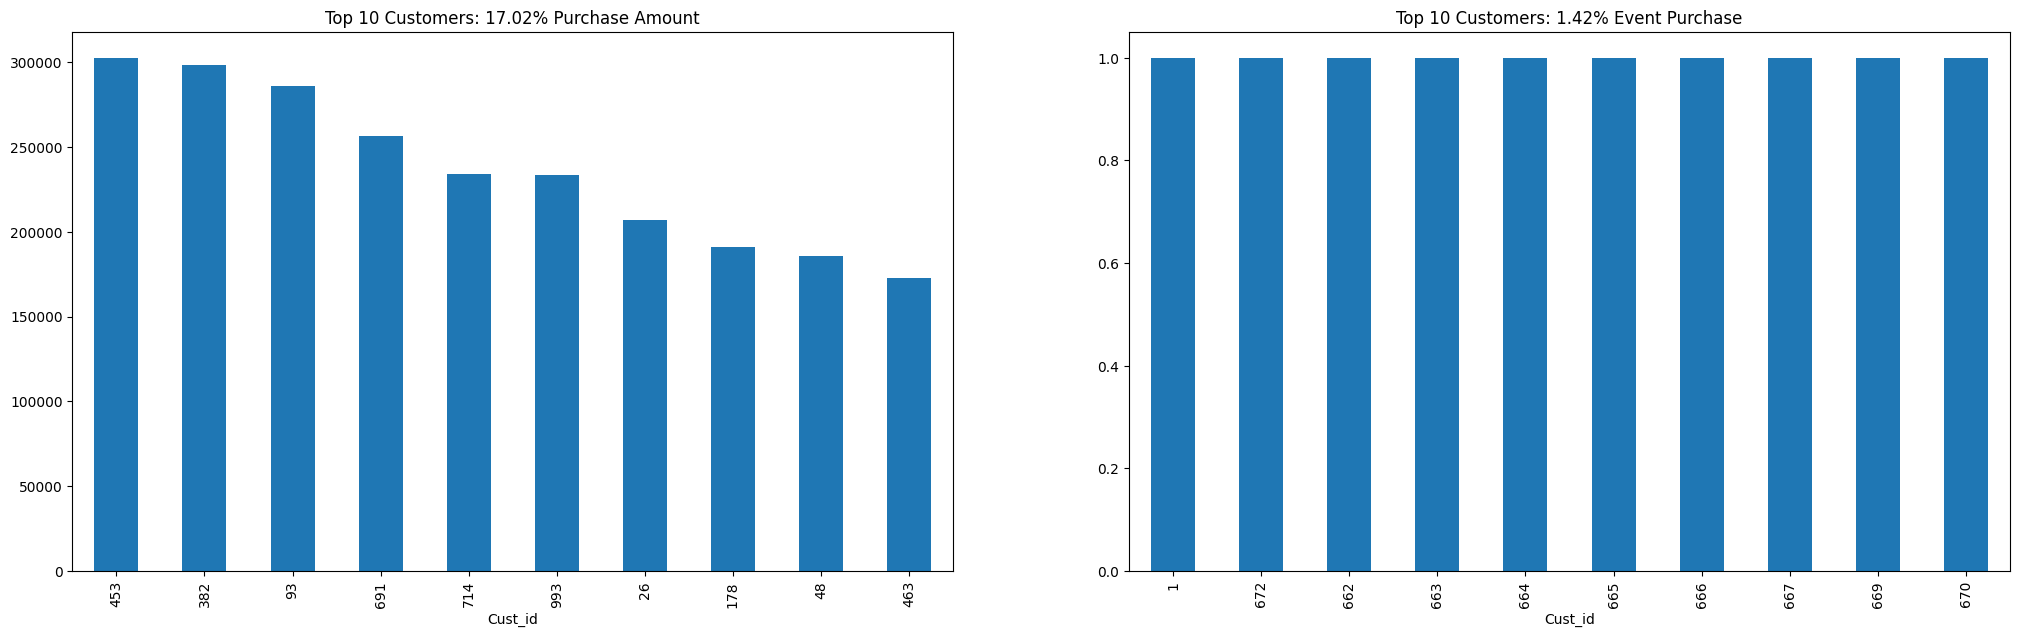

In [ ]:
fig = plt.figure(figsize=(25, 7))
PercentPurchase =  np.round((purchase.groupby(["Cust_id"]).Purchase_amount.sum().\
                          sort_values(ascending = False)[:51].sum()/purchase.groupby(["Cust_id"]).\
                          Purchase_amount.sum().sort_values(ascending = False).sum()) * 100, 2)
g = purchase.groupby(["Cust_id"]).Purchase_amount.sum().sort_values(ascending = False)[:51].\
    plot(kind='bar', title='Top Customers: {:3.2f}% Purchase Amount'.format(PercentPurchase))

fig = plt.figure(figsize=(25, 7))

f1 = fig.add_subplot(121)
PercentPurchase1 =  np.round((purchase.groupby(["Cust_id"]).Purchase_amount.sum().\
                          sort_values(ascending = False)[:10].sum()/purchase.groupby(["Cust_id"]).\
                          Purchase_amount.sum().sort_values(ascending = False).sum()) * 100, 2)
g = purchase.groupby(["Cust_id"]).Purchase_amount.sum().sort_values(ascending = False)[:10]\
    .plot(kind='bar', title='Top 10 Customers: {:3.2f}% Purchase Amount'.format(PercentPurchase1))

f2 = fig.add_subplot(122)
PercentPurchase2 =  np.round((purchase.groupby(["Cust_id"]).Purchase_amount.count().\
                          sort_values(ascending = False)[:10].sum()/purchase.groupby(["Cust_id"]).\
                          Purchase_amount.count().sort_values(ascending = False).sum()) * 100, 2)
g = purchase.groupby(["Cust_id"]).Purchase_amount.count().sort_values(ascending = False)[:10].\
    plot(kind='bar', title='Top 10 Customers: {:3.2f}% Event Purchase'.format(PercentPurchase2))

1     152
2      86
3      63
4      62
5      62
7      54
11     48
6      43
8      40
12     38
10     34
9      20
Name: TRANSACTION_MONTH, dtype: int64

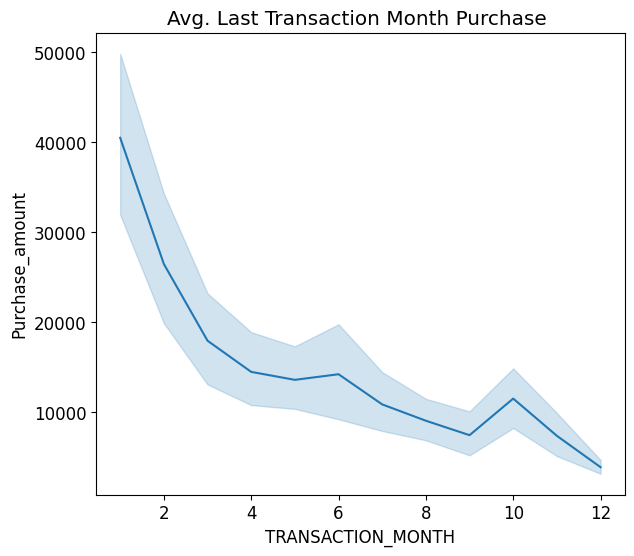

In [ ]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 12


plt.subplot(1, 2, 2)
sns.lineplot(x=purchase['TRANSACTION_MONTH'], y=purchase['Purchase_amount'])
plt.title('Avg. Last Transaction Month Purchase ')

purchase['TRANSACTION_MONTH'].value_counts()

Text(0.5, 1.0, 'Total_Discount')

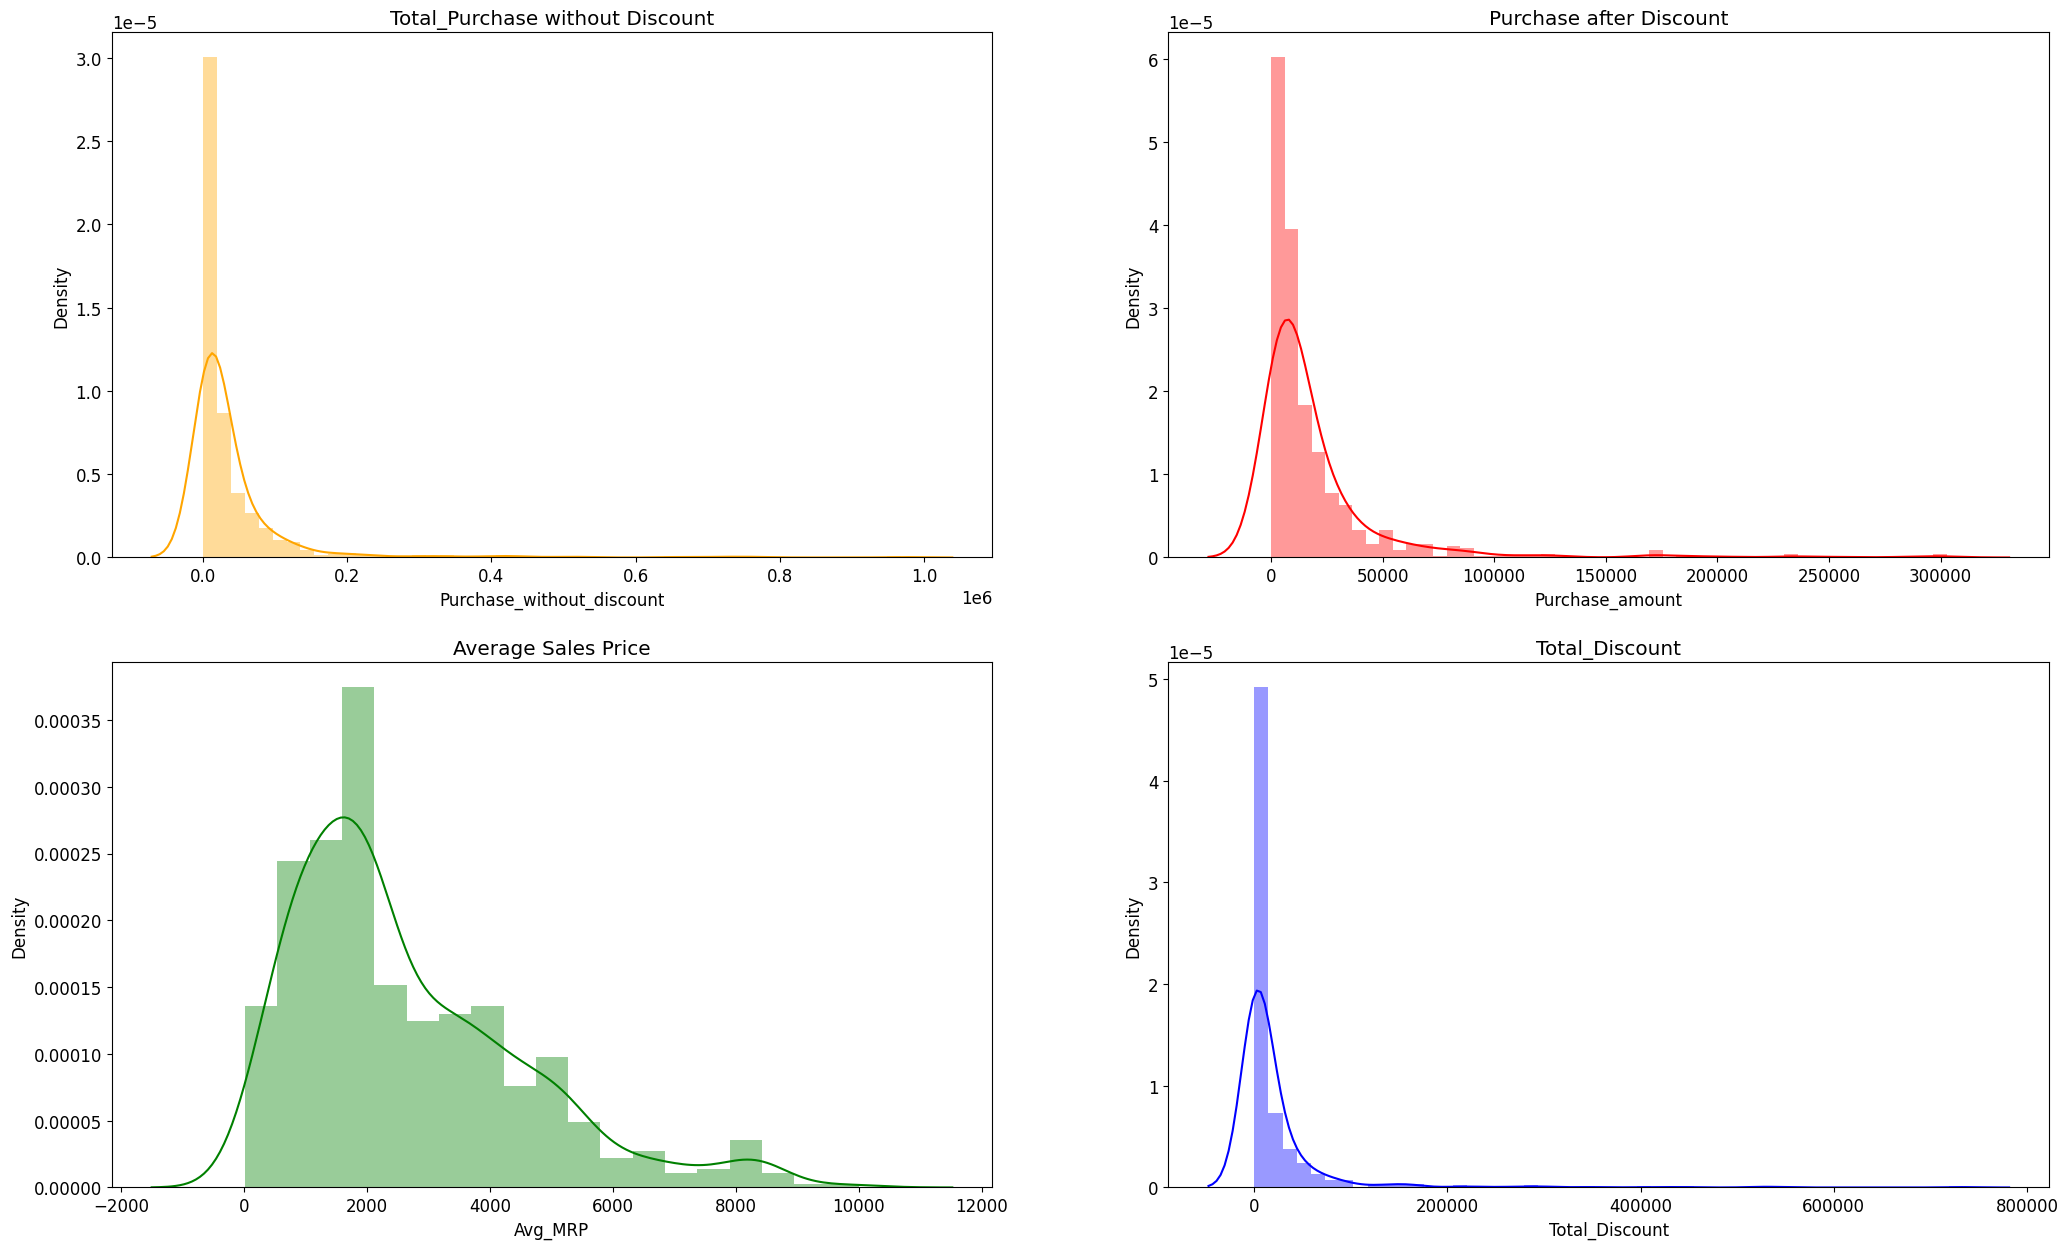

In [ ]:
plt.rcParams['figure.figsize'] = (25, 15)
plt.rcParams['font.size'] = 12

plt.subplot(2, 2, 1)
sns.distplot(purchase['Purchase_without_discount'],  color = 'orange')
plt.title('Total_Purchase without Discount')

plt.subplot(2, 2, 2)
sns.distplot(purchase['Purchase_amount'],  color = 'red')
plt.title('Purchase after Discount')

plt.subplot(2, 2, 3)
sns.distplot(purchase['Avg_MRP'],  color = 'green')
plt.title('Average Sales Price')
plt.subplot(2, 2, 4)
sns.distplot(purchase['Total_Discount'],  color = 'blue')
plt.title('Total_Discount')

In [ ]:
purchase['Purchase_amount']=np.log1p(purchase['Purchase_amount'])
purchase['Purchase_without_discount']=np.log1p(purchase['Purchase_without_discount'])
purchase['Avg_MRP']=np.log1p(purchase['Avg_MRP'])
purchase['Total_Discount']=np.log1p(purchase['Total_Discount'])
purchase['Items_Qty']=np.log1p(purchase['Items_Qty'])

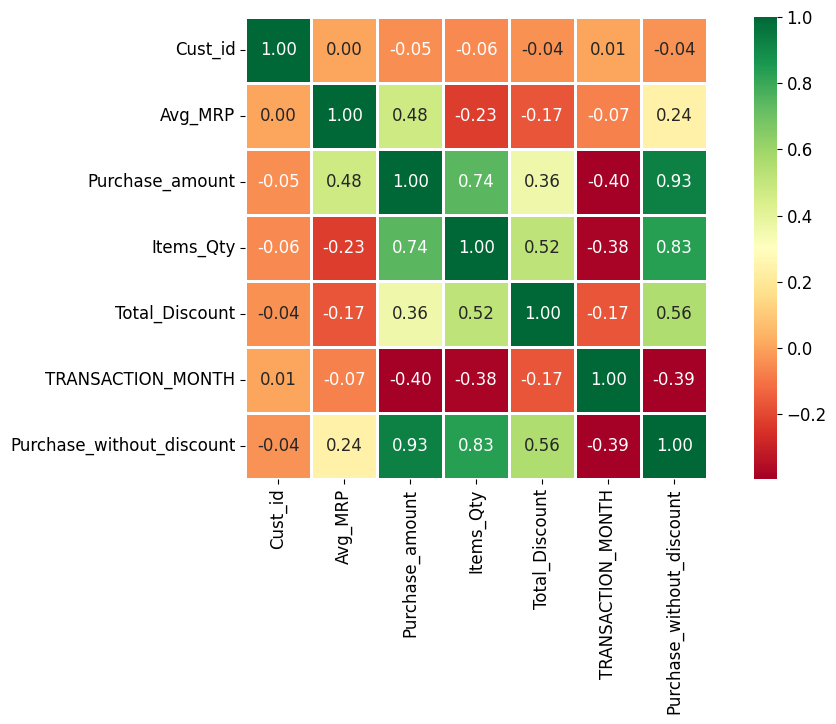

In [ ]:
f, ax = plt.subplots(figsize=(12,6))

sns.heatmap(purchase.corr(), square=True, cmap="RdYlGn",linewidth=1,annot=True,fmt='.2f');
plt.show()

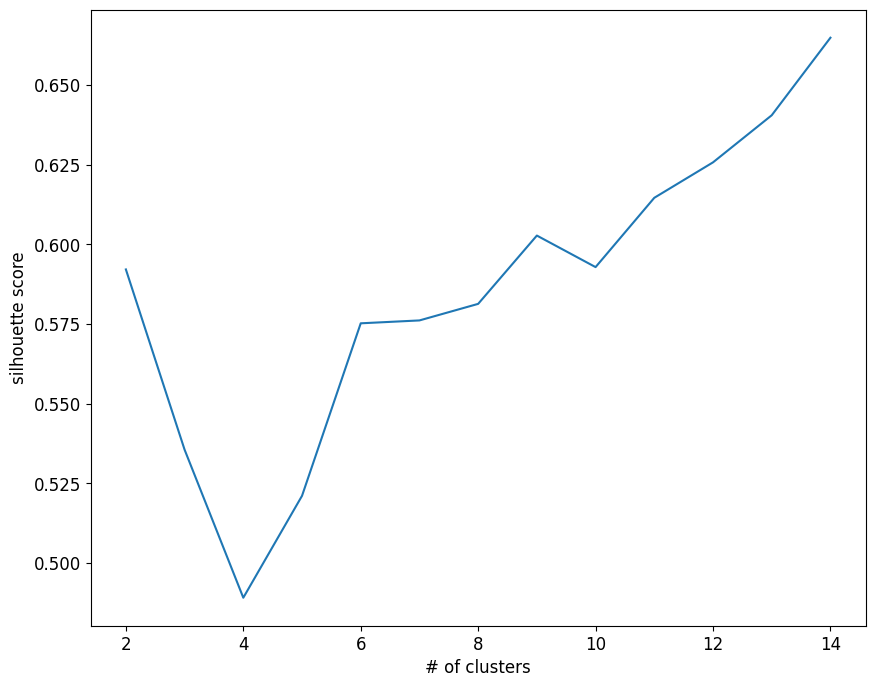

In [ ]:
plt.figure(figsize=[10,8])
plt.rcParams['font.size'] = 12
plt.plot([i for i in range(2,15)],silhouette_scores)
plt.xlabel('# of clusters')
plt.ylabel('silhouette score')
plt.show()

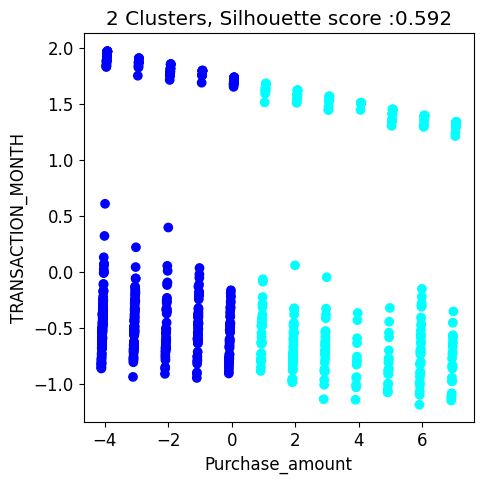

In [ ]:
cl=KMeans(n_clusters=2,random_state=0)
result=cl.fit_predict(reduced_data)
silhouette=silhouette_score(reduced_data,result)
plt.scatter(reduced_data.Dim1.values,reduced_data.Dim2.values,c=result,cmap=cmap)
plt.title(str(2)+' Clusters, Silhouette score :'+str(silhouette)[:5])
plt.xlabel('Purchase_amount')
plt.ylabel('TRANSACTION_MONTH')
fig,ax=plt.gcf(),plt.gca()
fig.set_size_inches(5,5)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn import preprocessing
X_subset = purchase[feature_names] #.as_matrix()
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
pd.DataFrame(X_scaled, columns=X_subset.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_MRP,702.0,2.863173e-15,1.000713,-7.204543,-0.524538,0.102917,0.735164,1.756622
Purchase_amount,702.0,-2.920108e-15,1.000713,-5.752971,-0.565405,0.020752,0.690230,2.397051
Items_Qty,702.0,-2.479814e-16,1.000713,-1.367959,-0.724829,-0.072199,0.718719,2.497635
Total_Discount,702.0,1.771296e-16,1.000713,-1.686374,-1.686374,0.501282,0.694261,0.992991
TRANSACTION_MONTH,702.0,2.024338e-17,1.000713,-1.131903,-0.851028,-0.289277,0.834223,1.957724


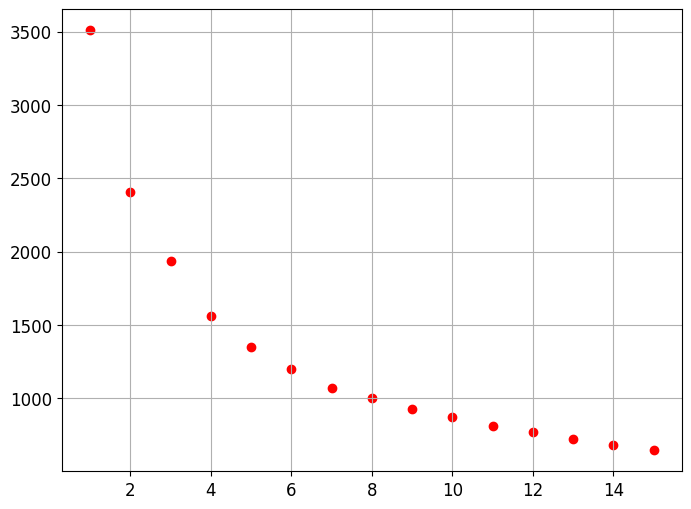

In [ ]:
cl = 15
corte = 0.1

anterior = 100000000000000
cost = []
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k,
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)
    model = model.fit(X_scaled)
    labels = model.labels_
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.grid(True)
plt.show()


In [ ]:
size=model.labels_
size=list(size)
purchase['Cluster'] = model.labels_
purchase.head()

,Avg_MRP,Purchase_amount,Items_Qty,Total_Discount,TRANSACTION_MONTH,Cluster
0,1.903168,2.090741,0.959135,0.000000,11,6
1,2.180354,2.452870,1.343703,2.507474,2,0
2,2.215245,2.288147,0.741276,2.036087,4,2
3,2.242697,2.353009,0.869742,2.118726,1,2
4,2.174214,2.435190,1.327761,2.376473,6,0


In [ ]:
purchase_copy['AVG_Actual_price_12']=np.log1p(purchase_copy['AVG_Actual_price_12'])
purchase_copy['Purchase_Value']=np.log1p(purchase_copy['Purchase_Value'])
purchase_copy['Total_Discount']=np.log1p(purchase_copy['Total_Discount'])
purchase_copy['No_of_Items']=np.log1p(purchase_copy['No_of_Items'])
purchase_copy.isnull().sum(),purchase_copy.shape

(Cust_id                         0
 AVG_Actual_price_12             0
 Purchase_Value                  0
 No_of_Items                     0
 Total_Discount                  0
 MONTH_SINCE_LAST_TRANSACTION    0
 dtype: int64,
 (702, 6))

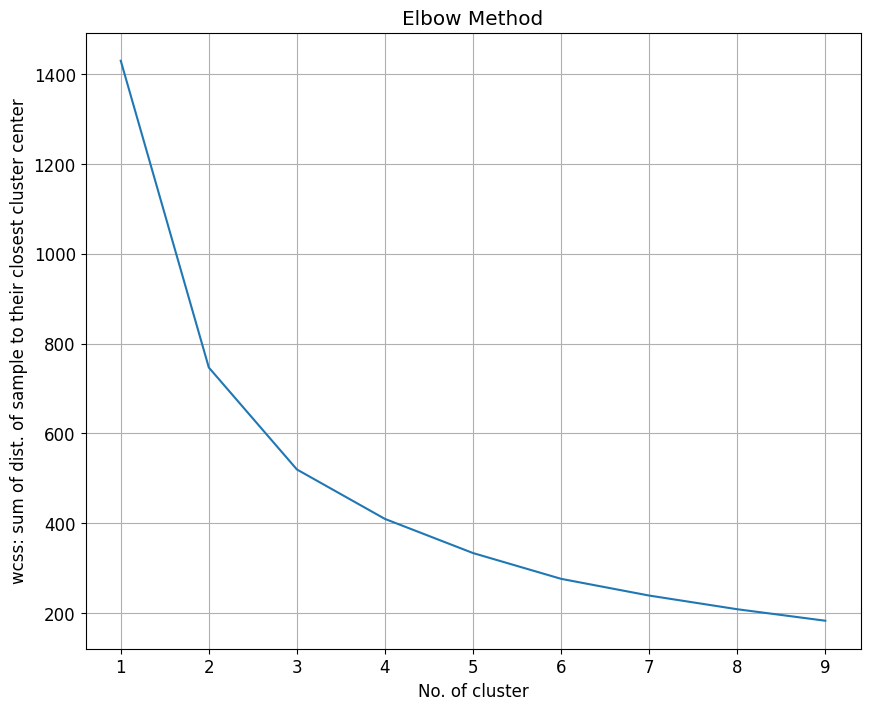

In [ ]:
feature1= purchase_copy.iloc[:,0:6]
feature1.drop(['Cust_id',],axis=1,inplace=True)
feature1 = pd.pivot_table(purchase_copy, values= ['AVG_Actual_price_12','Purchase_Value','No_of_Items'],index='Total_Discount',aggfunc=np.mean)
#feature1.tail()
X=feature1.values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=[10,8])
plt.rcParams['font.size'] = 12
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' )
plt.grid(True)
plt.show()

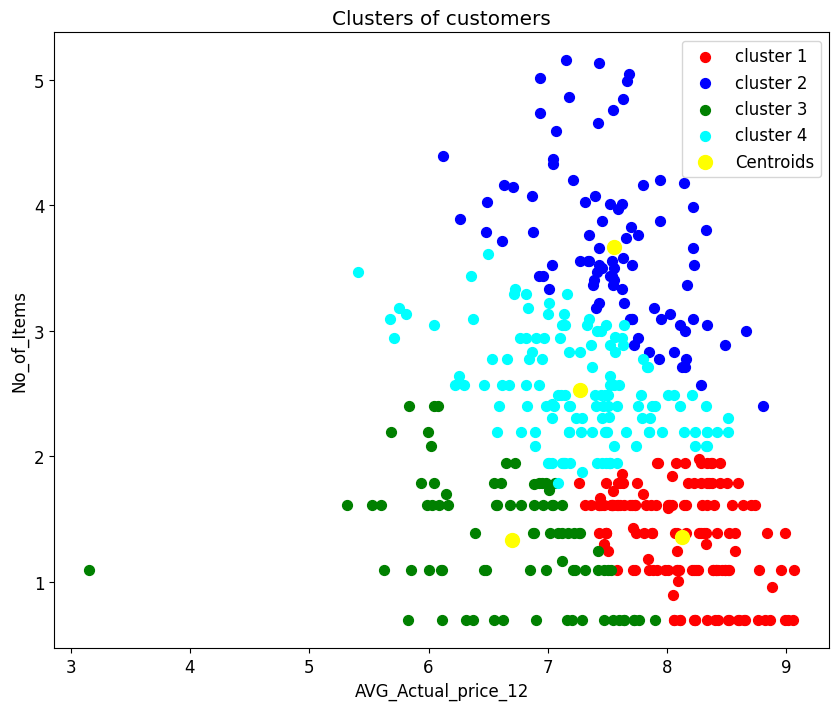

In [ ]:
kmeans_1=KMeans(n_clusters=4, n_init=10,max_iter=300, tol=1e-04, random_state=10)
kmeans_1.fit(X)
cluster_pred=kmeans_1.predict(X)
cluster_pred_2=kmeans_1.labels_
cluster_center=kmeans_1.cluster_centers_
plt.figure(figsize=(10,8))
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,1], s = 50, c = 'red', label ='cluster 1' )
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,1], s = 50, c = 'blue', label ='cluster 2' )
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,1], s = 50, c = 'green', label ='cluster 3' )
plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,1], s = 50, c = 'cyan', label = 'cluster 4')

plt.scatter(cluster_center[:,0],cluster_center[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.ylabel('No_of_Items')
plt.xlabel('AVG_Actual_price_12')
plt.legend()
plt.show()